<a href="https://www.kaggle.com/code/ekaterinapg/rfm-analysis?scriptVersionId=164164950" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#5DCEC6;margin:0;color:#05296E;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Libraries import</p> 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rfmtoday/rfm Analysis data.csv


In [2]:
# import necessary libraries
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=Warning)

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#5DCEC6;margin:0;color:#05296E;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data cleaning and transformation</p> 

In [3]:
# reading the csv file to the dataframe
df = pd.read_csv('/kaggle/input/rfmtoday/rfm Analysis data.csv', encoding='1251')

In [4]:
#checking the dataframe
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [5]:
# checking the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


We see the missing values for the Customer ID and the type of the InvoiceDate is object, we will transform it to datetime

In [6]:
# since we have missing values, we delete them
df.dropna(subset=['Customer ID'], inplace=True)

In [7]:
# checking the result
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [8]:
# checking quantity values distribution
df.describe()

,Quantity,Price,Customer ID
count,417534.000000,417534.000000,417534.000000
mean,12.758815,3.887547,15360.645478
std,101.220424,71.131797,1680.811316
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,13983.000000
50%,4.000000,1.950000,15311.000000
75%,12.000000,3.750000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [9]:
# since we have values less than 0 in the 'Quantity' columns, we filter the dataset and leave only values that are more than 0
df = df[df['Quantity']>0]

In [10]:
# Checking values distribution
df.describe()

,Quantity,Price,Customer ID
count,407695.000000,407695.000000,407695.000000
mean,13.586686,3.294188,15368.504107
std,96.842229,34.756655,1679.795700
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,10953.500000,18287.000000


In [11]:
# creating the new column by calculating amount for the product in the invoice and checking the result
df['amount'] = df['Price'] * df['Quantity']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom,7.50


In [12]:
# transorming the data type to the datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#5DCEC6;margin:0;color:#05296E;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploratory data analysis</p> 

In [13]:
# creating the new dataset by grouping the original one by Customer ID
df2 = df.groupby('Customer ID').agg(
    purchase_sum = ('amount', 'sum'),
    invoice_amount = ('Invoice', 'nunique'),
    last_purchase = ('InvoiceDate', 'last')
).reset_index()
df2

,Customer ID,purchase_sum,invoice_amount,last_purchase
0,12346.0,372.86,11,2010-06-28
1,12347.0,1323.32,2,2010-12-07
2,12348.0,222.16,1,2010-09-27
3,12349.0,2671.14,3,2010-10-28
4,12351.0,300.93,1,2010-11-29
...,...,...,...,...
4309,18283.0,641.77,6,2010-11-22
4310,18284.0,461.68,1,2010-10-04
4311,18285.0,427.00,1,2010-02-17
4312,18286.0,1296.43,2,2010-08-20


In [14]:
# calculating the date since the last purchase
df2['days_since_last_purchase']  = (df2['last_purchase'].max() - df2['last_purchase']) / np.timedelta64(1, 'D')

<Axes: >

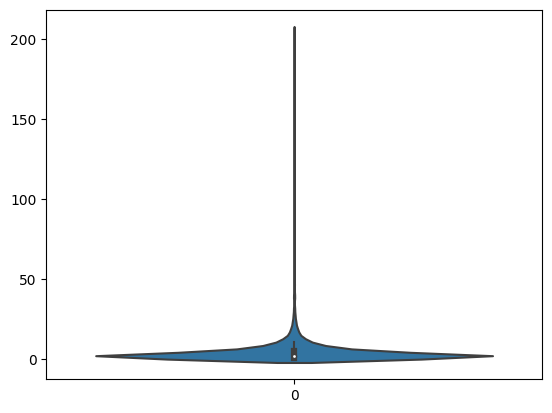

In [15]:
# checking the distribution of the invoice amount
sns.violinplot(df2['invoice_amount'])

<Axes: >

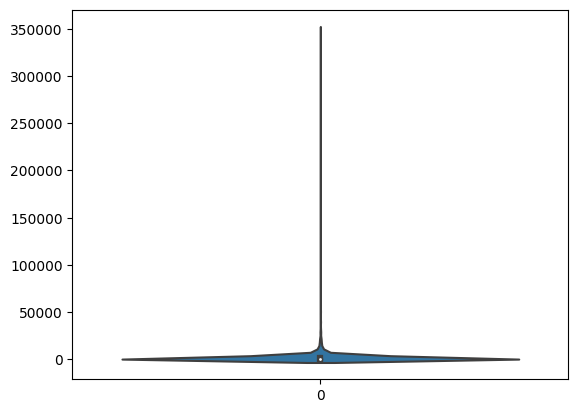

In [16]:
# checking the distribution for the purchase sum
sns.violinplot(df2['purchase_sum'])

In [17]:
# creating the variable for quantile
q = [round(i, 2) for i in np.arange(0.1, 1.1, 0.1)]

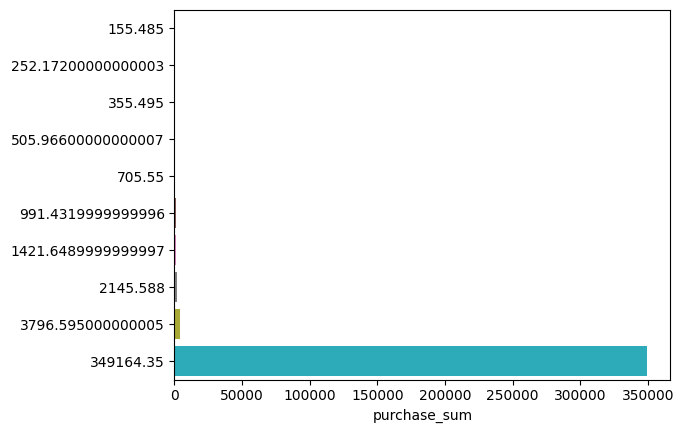

In [18]:
# checking the purchase_sum distribution by quantiles
ax = sns.barplot(
    data = df2['purchase_sum'].quantile(q),
    y = df2['purchase_sum'].quantile(q).values,
    x = df2['purchase_sum'].quantile(q).index,
    orient = 'h'
)

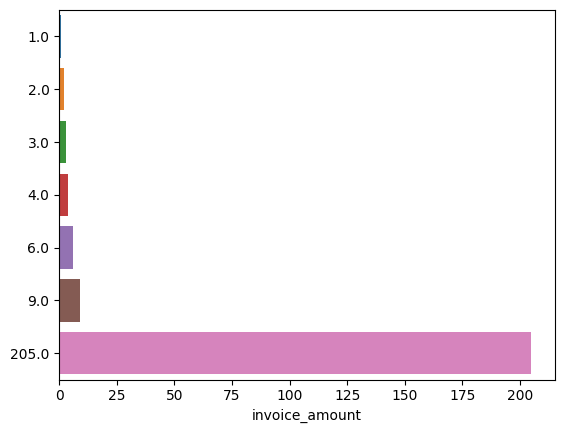

In [19]:
# checking the invoice_amount distribution by quantiles
ax = sns.barplot(
    data = df2['invoice_amount'].quantile(q),
    y = df2['invoice_amount'].quantile(q).values,
    x = df2['invoice_amount'].quantile(q).index,
    orient = 'h'
)

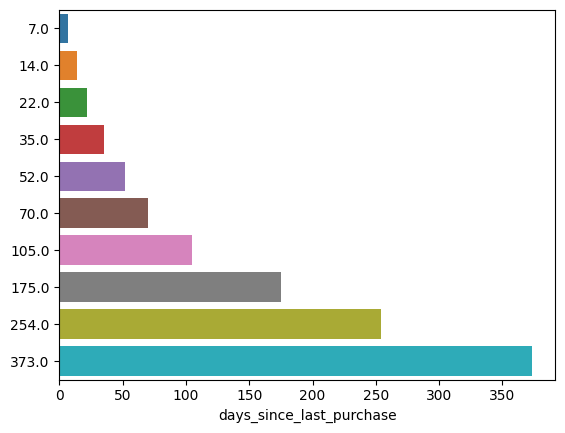

In [20]:
# checking the days_since_last_purchase distribution by quantiles
ax = sns.barplot(
    data = df2['days_since_last_purchase'].quantile(q),
    y = df2['days_since_last_purchase'].quantile(q).values,
    x = df2['days_since_last_purchase'].quantile(q).index,
    orient = 'h'
)


<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#5DCEC6;margin:0;color:#05296E;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">RFM analysis</p> 

<h4> For FRM analysis we will devide all dataset on 3 groups by quantiles, so it will be 0.33 and 0.66

In [21]:
# quantiles for the RFM analysis
q = [0.33, 0.66]

In [22]:
# function for creating the columns with scores
def set_score(val, var, perc_1, perc_2):
    if val < perc_1:
        if var != 'R':
            return 3
        else:
            return 1
    elif val < perc_2:
        return 2
    else:
        if var != 'R':
            return 1
        else:
            return 3

In [23]:
# calculating scores for our values
r_q = df2['days_since_last_purchase'].quantile(q)
df2['R'] = df2['days_since_last_purchase'].apply(set_score, args=('R', r_q.iloc[0], r_q.iloc[1]))

f_q = df2['invoice_amount'].quantile(q)
df2['F'] = df2['invoice_amount'].apply(set_score, args=('F', f_q.iloc[0], f_q.iloc[1]))

m_q = df2['purchase_sum'].quantile(q)
df2['M'] = df2['purchase_sum'].apply(set_score, args=('M', m_q.iloc[0], m_q.iloc[1]))

In [24]:
# total scores
df2['RFM'] = df2.apply(lambda x: f"{x.R}{x.F}{x.M}", axis=1)
df2['total_score'] = df2['R'] + df2['F'] + df2['M']
df2

,Customer ID,purchase_sum,invoice_amount,last_purchase,days_since_last_purchase,R,F,M,RFM,total_score
0,12346.0,372.86,11,2010-06-28,164.0,3,1,3,313,7
1,12347.0,1323.32,2,2010-12-07,2.0,1,2,1,121,4
2,12348.0,222.16,1,2010-09-27,73.0,2,3,3,233,8
3,12349.0,2671.14,3,2010-10-28,42.0,2,2,1,221,5
4,12351.0,300.93,1,2010-11-29,10.0,1,3,3,133,7
...,...,...,...,...,...,...,...,...,...,...
4309,18283.0,641.77,6,2010-11-22,17.0,1,1,2,112,4
4310,18284.0,461.68,1,2010-10-04,66.0,2,3,2,232,7
4311,18285.0,427.00,1,2010-02-17,295.0,3,3,2,332,8
4312,18286.0,1296.43,2,2010-08-20,111.0,3,2,1,321,6


In [25]:
# counting customerID by scores
df3 = df2.groupby(['RFM', 'total_score'])['RFM'].agg({'count'}).reset_index()
df3

,RFM,total_score,count
0,111,3,699
1,112,4,155
2,113,5,3
3,121,4,57
4,122,5,217
5,123,6,69
6,131,5,2
7,132,6,35
8,133,7,142
9,211,4,373


In [26]:
# treeplot distribution by scores
fig = px.treemap(df3, path=['RFM'], values='count')
fig.update_layout(margin= dict(t=50, l=25))
fig.show()

In [27]:
# checking the RFM-score distribution by meaen purchase_sum
df2.groupby('RFM').agg('purchase_sum').mean()

RFM
111    7347.382526
112     927.461484
113     330.696667
121    1986.877368
122     709.047235
123     278.244638
131    2441.890000
132     618.599143
133     215.645282
211    3496.644995
212     883.058134
213     290.650000
221    2136.399561
222     701.325180
223     272.791648
231    2608.516000
232     631.862957
233     217.678442
311    3488.486207
312     830.807619
313     319.477500
321    2372.408533
322     704.641167
323     251.943472
331    3261.026375
332     606.578096
333     196.897900
Name: purchase_sum, dtype: float64

In [28]:
# checking the RFM total score distribution by meaen purchase_sum
df2.groupby('total_score').agg('purchase_sum').mean()

total_score
3    7347.382526
4    2668.815595
5    1580.687474
6     926.853224
7     576.955517
8     316.019457
9     196.897900
Name: purchase_sum, dtype: float64

<h4>Let's check how the combined score arrange R,F and M

<Axes: xlabel='total_score'>

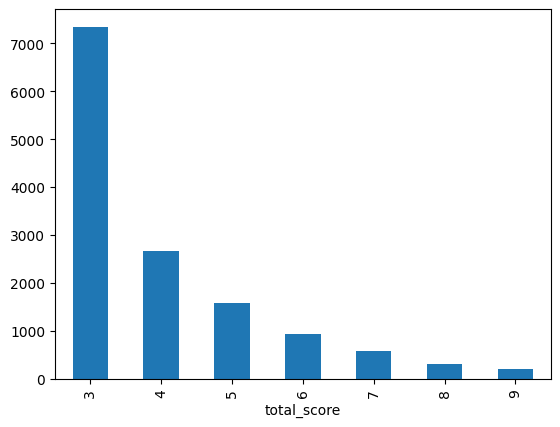

In [29]:
df2.groupby('total_score').agg('purchase_sum').mean().plot(kind='bar')

<Axes: xlabel='total_score'>

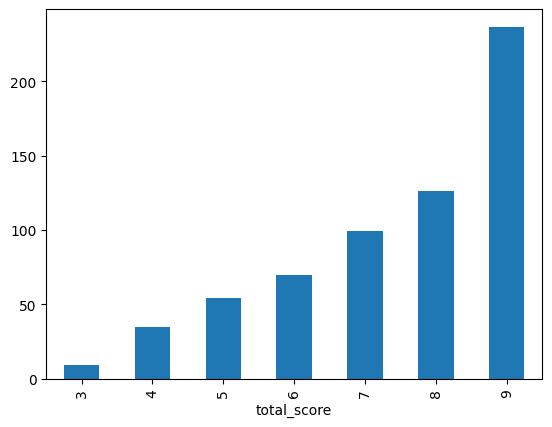

In [30]:
df2.groupby('total_score').agg('days_since_last_purchase').mean().plot(kind='bar')

We have distributed all our customers by following criterias: 
* amoun of days since last purchase, 
* total amount of purchases (invoices),
* total sum of purchases </br>
And devided them on groups by total score and RFM class ('RFM' and 'total_score'). After we will use these groups to trac sales by them, create a plan to improve sales for each group.